<a href="https://colab.research.google.com/github/yantiputri/SEMESTER-3/blob/main/praktikum7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Praktikum_ml/praktikum07'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ml/praktikum07/data/college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [ ]:
#cek duplicate
df.duplicated().sum()

#menghapus data duplicate
df.drop_duplicates(inplace=True)

#cek duplicated ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.rename(columns={
    'StudentID' : 'id_student',
    'Gender' : 'jenis_kelamin',
    'Parent_income' : 'pendapatan_ortu',
    'IQ' : 'kecerdasan',
    'Encourage' : 'motivasi',
    'Plan' : 'rencana',
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_student       8000 non-null   int64 
 1   jenis_kelamin    8000 non-null   object
 2   pendapatan_ortu  8000 non-null   int64 
 3   kecerdasan       8000 non-null   int64 
 4   motivasi         8000 non-null   object
 5   rencana          8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


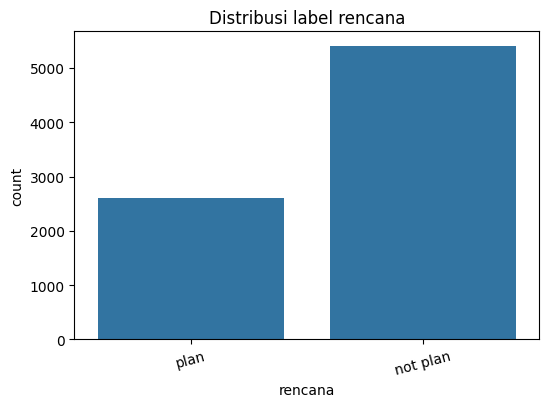

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='rencana', data=df)
plt.title('Distribusi label rencana')
plt.xticks(rotation=15)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['jenis_kelamin', 'motivasi', 'rencana']:
    df[col] = le.fit_transform(df[col])

df.head()

,id_student,jenis_kelamin,pendapatan_ortu,kecerdasan,motivasi,rencana
0,4558,1,53900,118,0,1
1,4561,0,24900,87,1,0
2,4563,0,65800,93,1,0
3,4565,1,11440,117,0,1
4,4567,0,16700,102,1,0


Analisis korelasi

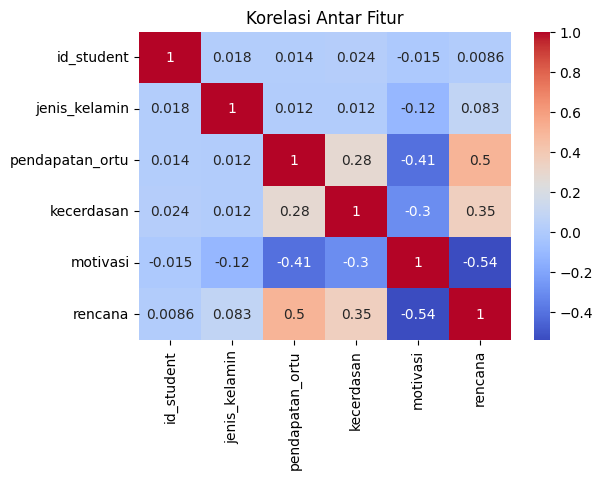

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [ ]:
#memilih fitur dan target
feature_cols = ['jenis_kelamin', 'pendapatan_ortu', 'kecerdasan', 'motivasi']
X = df[feature_cols]
y = df['rencana']

#membagi dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
len(x_train), len(x_test)

(6400, 1600)

In [ ]:
#membangun model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
#evaluasi
y_pred = dt.predict(x_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['not plan', 'plan']))

Akurasi: 82.62 %

Confusion Matrix:
 [[960 121]
 [157 362]]

Classification Report:
               precision    recall  f1-score   support

    not plan       0.86      0.89      0.87      1081
        plan       0.75      0.70      0.72       519

    accuracy                           0.83      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.82      0.83      0.82      1600



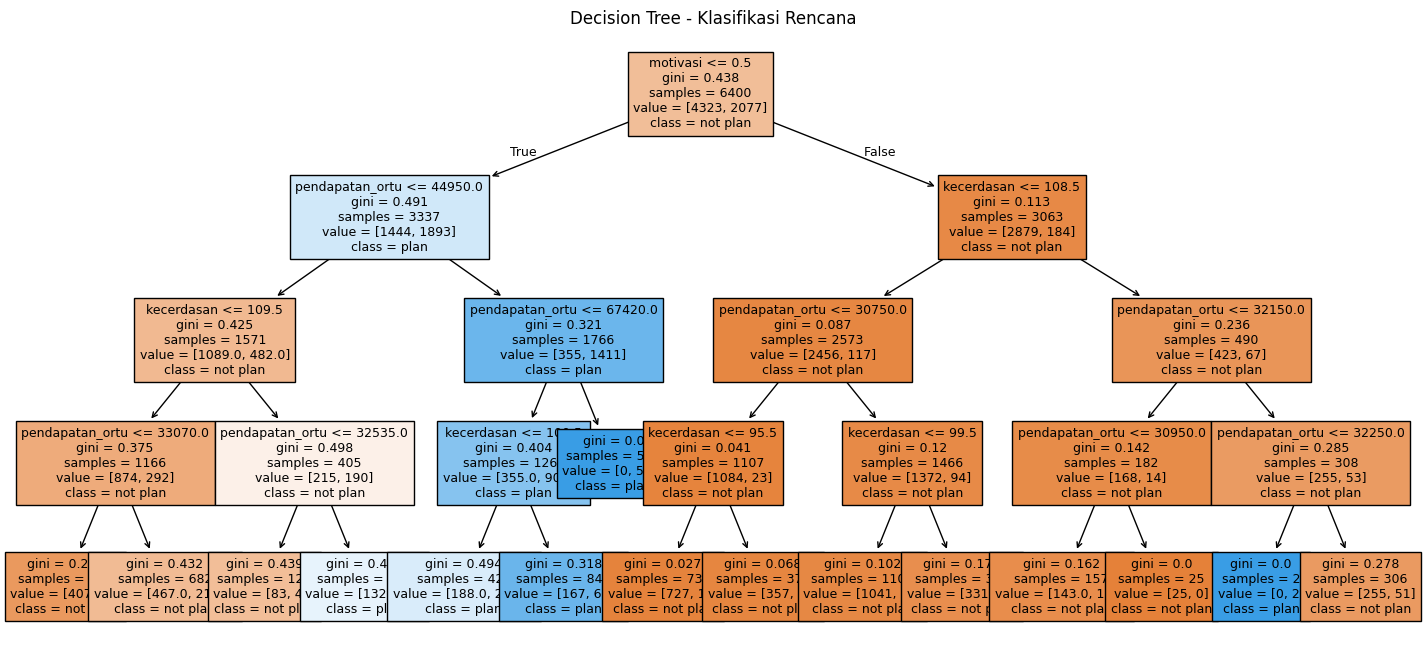

In [ ]:
#visualisasi model
plt.figure(figsize=(18, 8))
plot_tree(dt, feature_names=feature_cols, class_names=['not plan', 'plan'], filled=True, fontsize=9)
plt.title('Decision Tree - Klasifikasi Rencana')
plt.show()

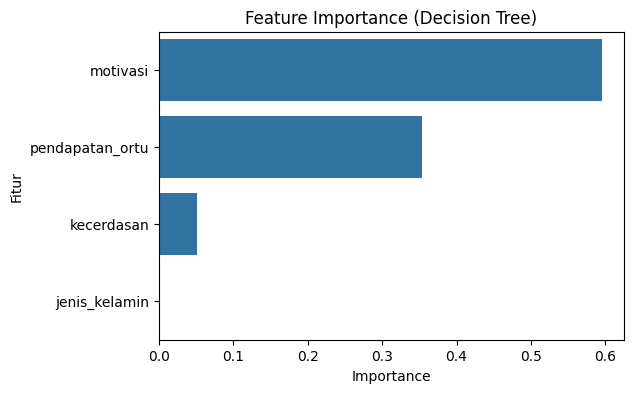

,0
motivasi,0.594873
pendapatan_ortu,0.353383
kecerdasan,0.051744
jenis_kelamin,0.000000


In [ ]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

Hyperparameter Tuning (Menentukan max_depth Terbaik)

In [ ]:
scores = {}
for d in range(2, 9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(x_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(x_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc :", round(scores[best_d]*100,2), "%")

Best max_depth: 4 | Acc : 82.62 %
